In [11]:

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
seed = 7
np.random.seed(seed)

In [32]:
df = pd.read_csv('csv_session2.csv', index_col=0, parse_dates=True)

In [33]:
df.head()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
Timestamp (GMT),,,,
2016-02-24 15:53:00,NaN,NaN,85.0,72.0
2016-02-24 15:54:00,61441.0,61441.0,90.0,123.0
2016-02-24 15:55:00,153.0,51.0,91.0,153.0
2016-02-24 15:56:00,153.0,48.0,92.0,136.0
2016-02-24 15:57:00,153.0,46.0,NaN,NaN


In [50]:
len(df)

4074

In [35]:
#data preprocessing
df = df.dropna()
df=  df.loc[df['Lifetouch Heart Rate'] <= 200]
df=  df.loc[df['Oximeter SpO2'] >= 40]

In [224]:
train, test = df.values[:-3074], df.values[-3074:]

In [225]:
def one_step_baseline_prediction(train, test):
    history = [x for x in train]
    predictions = list()

    for i in range(len(test)):
        predictions.append(history[-1])
        history.append(test[i])

    return predictions

In [226]:
prediction = one_step_baseline_prediction(train, test)

In [227]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

import pickle
def report_performance(test, predictions):
    rmse = sqrt(mean_squared_error(test, predictions))
    print('RMSE: %.3f' % rmse)

    mae = mean_absolute_error(test, predictions)
    print('MAE: %.3f' % mae)

    fig = plt.figure(figsize=(25,10))
    plt.plot(test[:50], label='real')
    plt.plot(predictions[:50], label='predicted')
    plt.legend(loc='upper right')
    plt.show()
    
    #fig = plt.figure(figsize=(25,10))
    #plt.plot(test, label='real')
    #plt.plot(predictions, label='predicted')
    #plt.legend(loc='upper right')
    #plt.show()

    return rmse

RMSE: 3.820
MAE: 2.011


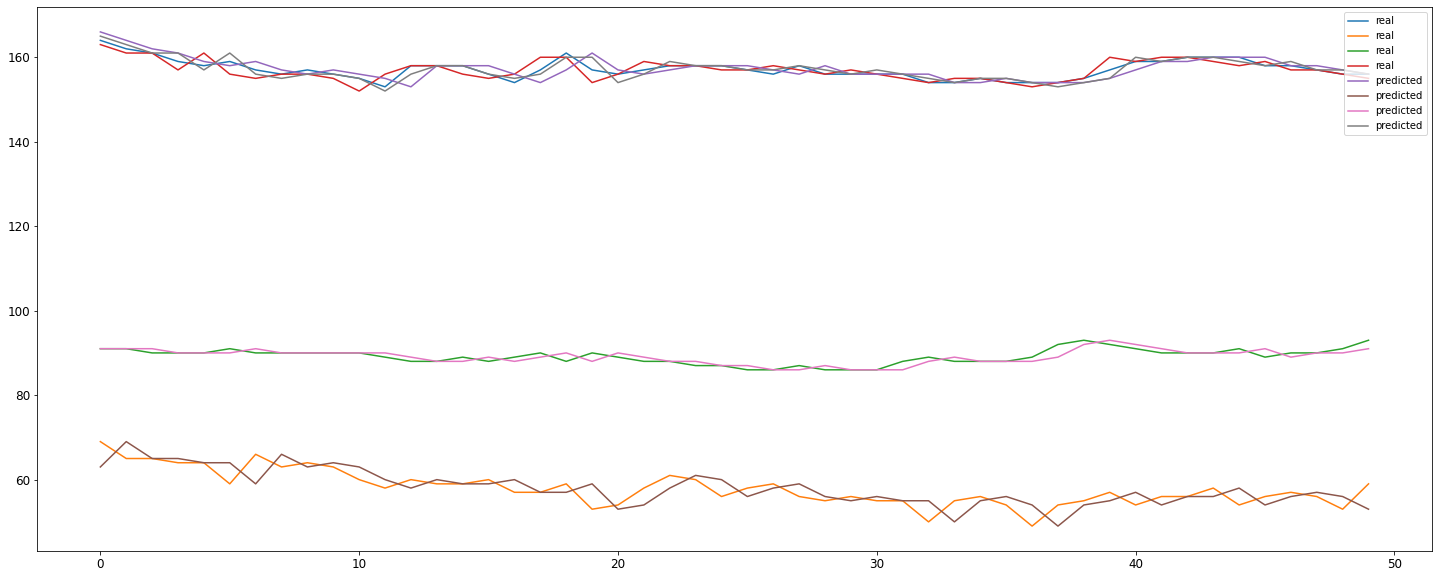

3.8196790376356264

In [228]:
report_performance(test, prediction)

RMSE: 3.317
MAE: 2.500


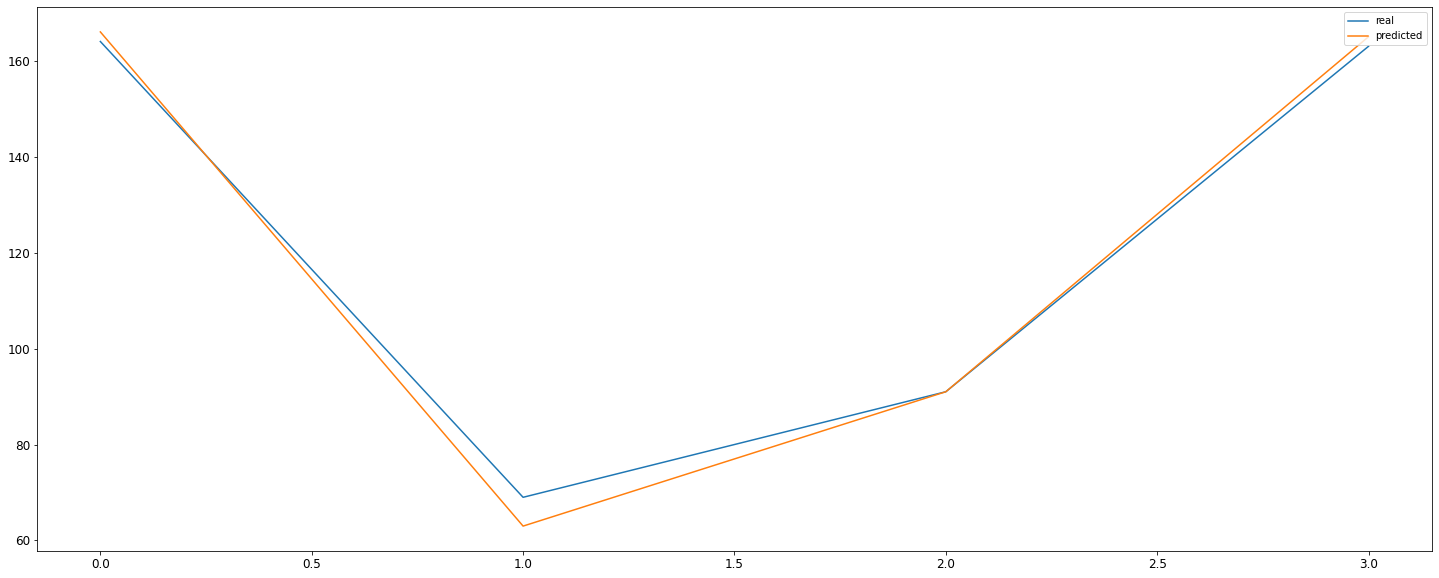

3.3166247903554

In [229]:
report_performance(test[0], prediction[0])